In [83]:
# requires iblenv

import numpy as np
import ibllib.atlas.atlas as atlas
from ibllib.atlas.regions import BrainRegions
import matplotlib.pyplot as plt
import unityneuro.render as urn
import pandas as pd

br = BrainRegions()
AllenAtlas = atlas.AllenAtlas()

In [107]:
ccf_id = AllenAtlas.regions.id[AllenAtlas.label]

In [108]:
ontology = pd.read_csv('./ontology_structure_minimal.csv')
ids = ontology['id'].values
beryl_ids = ontology['beryl_id'].values
acronyms = ontology['acronym'].values

# get the acronym for each beryl ID


In [177]:
def id2beryl(id):
    idx = np.nonzero(ids==id)
    return beryl_ids[idx][0]

In [212]:
ml_slice_coords_um = [-1800, -800, -200]
ml_slice_coords = [-1800/25 + 456/2, -800/25 + 456/2, -200/25 + 456/2]
print(ml_slice_coords)
ml_slice_coords = [50,125,200]

[156.0, 196.0, 220.0]


In [213]:
out = ccf_id[:,int(ml_slice_coords[0]),:]

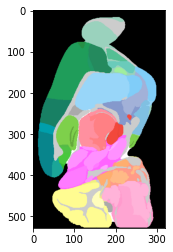

In [207]:
plt.imshow(AllenAtlas.slice(ml_slice_coords_um[0]/1000000,0,volume='annotation'))

In [214]:
out_unique = np.unique(out.flatten())

In [215]:
urn.setup()

(urchin) Client is already connected


In [216]:
urn.clear_areas()

area_names = []
area_visibility = {}

for area in out_unique:
    if area != 0 and area != 8:
        acronym = br.id2acronym(id2beryl(np.abs(area)))[0]
        if acronym != 'root':
            area_names.append(acronym)
        
area_names = np.unique(area_names)

for area_name in area_names:
    area_visibility[area_name] = True

urn.set_area_visibility(area_visibility)

packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


packet queue is empty, aborting


(URN) disconnected from server
(URN) connected to server
Login sent with ID: Dan


In [150]:
area_names

'MM'

In [188]:
all_ids = []
for i in np.arange(3):
    out = ccf_id[:,int(ml_slice_coords[i]),:]
    for id in np.unique(out.flatten()):
        if id != 0:
            all_ids.append(id)

In [191]:
all_beryl_ids = []

for id in all_ids:
    all_beryl_ids.append(id2beryl(np.abs(id)))

all_beryl_ids = np.unique(all_beryl_ids)

In [192]:
missing_beryl_ids = list(set(beryl_ids) - set(all_beryl_ids))

In [196]:
urn.clear_areas()

area_names = []
area_visibility = {}

for area in missing_beryl_ids:
    acronym = br.id2acronym(area)[0]
    if acronym != 'root':
        area_names.append(acronym)
        
area_names = np.unique(area_names)

for area_name in area_names:
    area_visibility[area_name] = True

urn.set_area_visibility(area_visibility)

In [200]:
len(area_visibility)

85